In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

/Users/MAIKO/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/MAIKO/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/MAIKO/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/MAIKO/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [3]:
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf

In [6]:
frames = []
years = ['2018', '2019', '2020']

# for year in years:
#     for i in range(1, 13):
#         try:
#             d = pd.read_json('data/sales_01-07-2018_31-09-2020/SAS/{}_{}.json'.format(i, year))
#             frames.append(pd.DataFrame(d))
#         except:
#             continue

d = pd.read_json('data/sales_01-07-2018_31-09-2020/SAS/7_2018.csv')
frames.append(pd.DataFrame(d))

df = pd.concat(frames)
df = df.reset_index(drop=True)

ValueError: Expected object or value

In [ ]:
from datetime import datetime

for i in df.index:
    c = df.loc[i, 'category']
    id = df.loc[i, 'id']

    if c == 'bakedgoods':
        df.loc[i, 'category'] = 1
    elif c == 'breakfast':
        df.loc[i, 'category'] = 2
    elif c == 'lunch':
        df.loc[i, 'category'] = 3

In [ ]:
df = df.dropna()
df

In [ ]:
df = df.drop(df[(df.prevdaysales1 == 0) & (df.prevdaysales2 == 0) & (df.prevdaysales3 == 0)].index)

df_names = df.iloc[:, 1]

df = df.drop(['name', 'date', 'category', 'weeknum', 'year', 
              'temp', 'growth', 'month'], axis=1)

In [ ]:
df_names

In [ ]:
pd.set_option('display.max_rows', None)

df_single_item = df

In [ ]:
## calculate sales growth of this week compared to last week

# for i in df_single_item.index:
#     current_week = 0
#     last_week = 0
#     for num in range(1, 3):
#         current_week += df_single_item.loc[i, 'prevdaysales{}'.format(num)]
#     for num in range(8, 10):
#         last_week += df_single_item.loc[i, 'prevdaysales{}'.format(num)]
        
#     change = ((current_week - last_week) / last_week) * 100
#     change = format(change, '.1f')
#     df_single_item.loc[i, 'growth'] = change

In [ ]:
# cols = df_single_item.columns.tolist()
# cols = cols[:-2] + [cols[-1]] + [cols[-2]]
# cols

In [ ]:
# df_single_item = df_single_item[cols]

In [ ]:
pd.set_option('display.max_columns', None)

df_single_item = df_single_item.replace(['inf', 'inf', 'nan'], 0.0)

In [ ]:
df_single_item

In [ ]:
dataset = df_single_item.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
pd.DataFrame(dataset)

In [ ]:
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
test_names = df_names[train_size:len(dataset)]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [271]:
test_names = test_names.index.astype(str) + ' ' + test_names.values

In [272]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1])) 
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(438, 1, 19) (438,) (49, 1, 19) (49,)


In [273]:
model = Sequential()
model.add(LSTM(8, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [274]:
# opt = Adam(lr=0.001)
    
# inp_seq = Input(shape=(train_X.shape[1], train_X.shape[2]))

# x = Bidirectional(GRU(16, return_sequences=True))(inp_seq)
# x = AveragePooling1D(1)(x)
# x = Conv1D(16, 1)(x)
# x = Flatten()(x)
# # x = Dense(16, activation='relu')(x)

# out = Dense(1)(x)

# model = Model(inp_seq, out)
# model.compile(optimizer=opt, loss='mse')

Train on 438 samples, validate on 49 samples
Epoch 1/80
438/438 - 1s - loss: 0.0549 - val_loss: 0.0237
Epoch 2/80
438/438 - 0s - loss: 0.0288 - val_loss: 0.0164
Epoch 3/80
438/438 - 0s - loss: 0.0220 - val_loss: 0.0207
Epoch 4/80
438/438 - 0s - loss: 0.0221 - val_loss: 0.0222
Epoch 5/80
438/438 - 0s - loss: 0.0214 - val_loss: 0.0212
Epoch 6/80
438/438 - 0s - loss: 0.0204 - val_loss: 0.0210
Epoch 7/80
438/438 - 0s - loss: 0.0196 - val_loss: 0.0217
Epoch 8/80
438/438 - 0s - loss: 0.0191 - val_loss: 0.0226
Epoch 9/80
438/438 - 0s - loss: 0.0187 - val_loss: 0.0233
Epoch 10/80
438/438 - 0s - loss: 0.0183 - val_loss: 0.0238
Epoch 11/80
438/438 - 0s - loss: 0.0179 - val_loss: 0.0244
Epoch 12/80
438/438 - 0s - loss: 0.0177 - val_loss: 0.0249
Epoch 13/80
438/438 - 0s - loss: 0.0174 - val_loss: 0.0253
Epoch 14/80
438/438 - 0s - loss: 0.0172 - val_loss: 0.0257
Epoch 15/80
438/438 - 0s - loss: 0.0170 - val_loss: 0.0260
Epoch 16/80
438/438 - 0s - loss: 0.0169 - val_loss: 0.0263
Epoch 17/80
438/438 

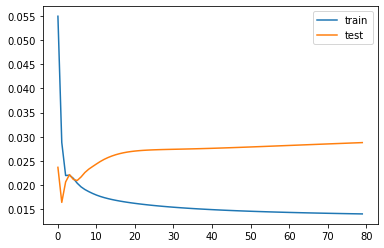

In [275]:
history = model.fit(train_X, train_y, epochs=80, validation_data=(test_X, test_y), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [276]:
#prediction on training and testing data
train_predict = model.predict(train_X)    
test_predict = model.predict(test_X)       

#converting from three dimension to two dimension
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [277]:
train_predict

array([[ 2.9467037e-01],
       [ 2.6710024e-01],
       [ 2.3413508e-01],
       [ 4.0201950e-01],
       [ 1.8788569e-01],
       [ 2.9375038e-01],
       [ 3.1362861e-01],
       [ 1.0539393e-01],
       [ 1.8371849e-01],
       [ 1.0281814e-02],
       [ 8.1734523e-02],
       [ 8.4203400e-02],
       [ 1.3189681e-01],
       [ 8.8552907e-02],
       [ 1.5548045e-02],
       [ 4.8029059e-01],
       [ 3.0669546e-01],
       [ 3.3056253e-01],
       [ 2.4397781e-01],
       [ 3.8761088e-01],
       [ 3.0585110e-01],
       [ 1.5376683e-01],
       [ 2.9910928e-01],
       [ 5.8566406e-02],
       [ 1.4125998e-01],
       [ 1.6895260e-01],
       [ 1.3149573e-01],
       [ 9.6102711e-05],
       [ 1.9917985e-02],
       [ 2.1007596e-01],
       [ 1.2582943e-01],
       [ 4.1273177e-01],
       [ 3.2003355e-01],
       [ 3.8021395e-01],
       [ 3.4345144e-01],
       [ 2.0949186e-01],
       [ 3.6339974e-01],
       [ 3.5292584e-01],
       [ 1.1526961e-02],
       [ 1.2866321e-01],


In [278]:
inv_train_predict = concatenate((train_X, train_predict), axis=1)
inv_test_predict = concatenate((test_X, test_predict), axis=1)

#transforming to original scale
inv_train_predict = scaler.inverse_transform(inv_train_predict)
inv_test_predict = scaler.inverse_transform(inv_test_predict)

In [279]:
#predicted values on training data
inv_train_predict = inv_train_predict[:, -1]
inv_train_predict

array([ 5.59873709e+00,  5.07490465e+00,  4.44856645e+00,  7.63837051e+00,
        3.56982805e+00,  5.58125713e+00,  5.95894367e+00,  2.00248469e+00,
        3.49065126e+00,  1.95354471e-01,  1.55295594e+00,  1.59986459e+00,
        2.50603937e+00,  1.68250524e+00,  2.95412851e-01,  9.12552124e+00,
        5.82721376e+00,  6.28068811e+00,  4.63557848e+00,  7.36460677e+00,
        5.81117094e+00,  2.92156969e+00,  5.68307632e+00,  1.11276172e+00,
        2.68393968e+00,  3.21009938e+00,  2.49841885e+00,  1.82595151e-03,
        3.78441723e-01,  3.99144323e+00,  2.39075914e+00,  7.84190357e+00,
        6.08063745e+00,  7.22406498e+00,  6.52557737e+00,  3.98034541e+00,
        6.90459514e+00,  6.70559090e+00,  2.19012257e-01,  2.44460103e+00,
        5.12465543e+00,  1.47140178e+00,  3.15706949e+00,  3.18813619e+00,
        2.40258940e+00, -1.29415183e-02,  1.70629570e+00,  2.88085369e-01,
        9.63397110e+00,  7.05032033e+00,  8.64201841e+00,  5.58142078e+00,
        2.51009934e+00,  

In [280]:
#predicted values on testing data
inv_test_predict = inv_test_predict[:, -1]
inv_test_predict 

array([ 0.99915248,  1.31096387,  8.5871352 ,  8.68029141,  9.77978122,
        6.11091623,  8.93774337, 10.29499656,  6.66575563,  1.98760097,
        8.89007241,  5.27633864,  7.39174289,  7.65838951,  6.12147725,
        5.74384224,  8.37530667,  7.67656764,  8.98370427,  8.85337922,
       11.30734932,  5.73876756, 10.14140284,  8.3381418 ,  5.74771762,
        1.87219277,  8.25213555,  4.1797732 ,  7.34831592,  7.24047813,
        7.34501415,  5.12174323,  1.41648573, 11.41072625, 11.35171455,
        9.40760934,  9.73418045,  9.81445122,  6.77154249, 10.052028  ,
        6.01876396,  1.8329379 ,  9.28808087,  5.71294004,  9.83406025,
        6.90440658,  6.7999804 ,  7.66357291,  1.38144017])

In [281]:
inv_test_predict = np.round(inv_test_predict, 0)
# inv_test_predict = inv_test_predict + 2

In [282]:
inv_test_predict

array([ 1.,  1.,  9.,  9., 10.,  6.,  9., 10.,  7.,  2.,  9.,  5.,  7.,
        8.,  6.,  6.,  8.,  8.,  9.,  9., 11.,  6., 10.,  8.,  6.,  2.,
        8.,  4.,  7.,  7.,  7.,  5.,  1., 11., 11.,  9., 10., 10.,  7.,
       10.,  6.,  2.,  9.,  6., 10.,  7.,  7.,  8.,  1.])

In [283]:
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)

In [284]:
#scaling back the original train labels
train_y = train_y.reshape((len(train_y), 1))
inv_train_y = concatenate((train_X, train_y), axis=1)
inv_train_y = scaler.inverse_transform(inv_train_y)
inv_train_y = inv_train_y[:,-1]

In [285]:


#scaling back the original test labels
test_y = test_y.reshape((len(test_y), 1))
inv_test_y = concatenate((test_X, test_y), axis=1)
inv_test_y = scaler.inverse_transform(inv_test_y)
inv_test_y = inv_test_y[:,-1]
inv_test_y = inv_test_y.flatten()

In [286]:
#calculating rmse on train data
rmse_train = sqrt(mean_squared_error(inv_train_y, inv_train_predict))
print('Test RMSE: %.3f' % rmse_train)

Test RMSE: 2.244


In [287]:
#calculating rmse on test data
rmse_test = sqrt(mean_squared_error(inv_test_y, inv_test_predict))
print('Test RMSE: %.3f' % rmse_test)

Test RMSE: 3.185


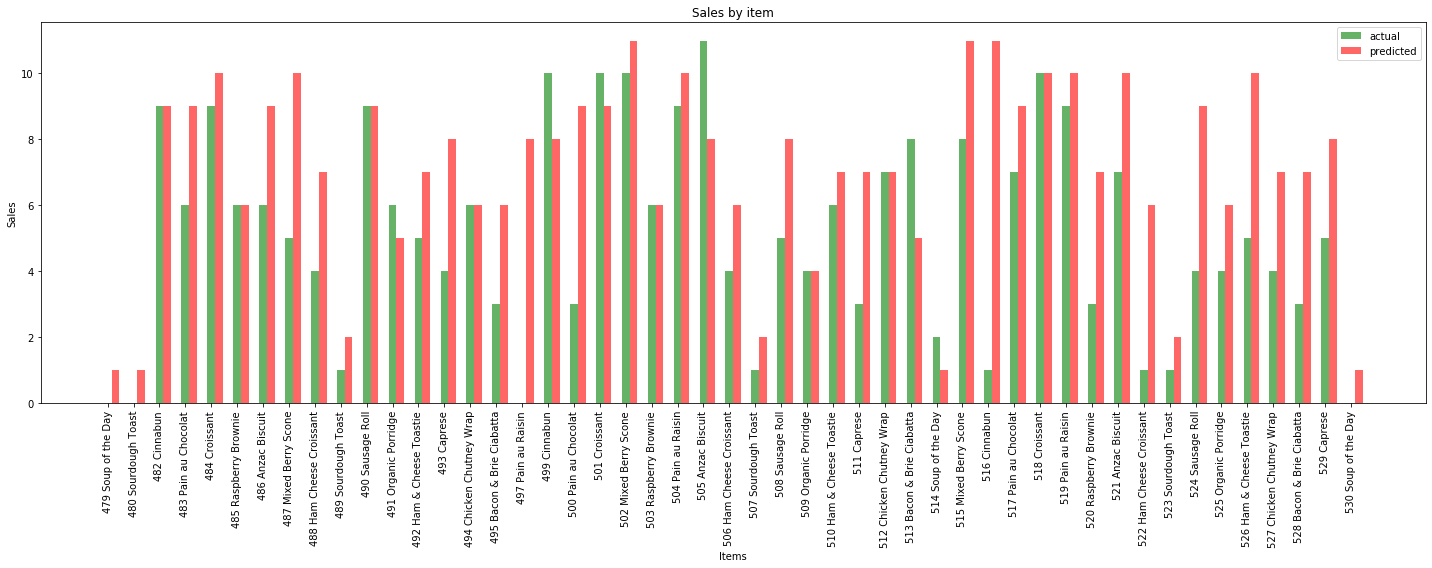

In [288]:
# #plotting the graph of test actual vs predicted
# inv_test_y = inv_test_y.reshape(-1,1)
# inv_test_y.shape

# t = np.arange(0,54,1)

# plt.figure(figsize=(20,10))
# plt.plot(t,inv_test_y,label="actual")
# plt.plot(t,inv_test_predict,'r',label="predicted")
# plt.show()

# create plot
fig, ax = plt.subplots(figsize=(20,8))
index = np.arange(0,test_y.shape[0],1)
bar_width = 0.30
opacity = 0.6

rects1 = plt.bar(test_names, inv_test_y, bar_width,
alpha=opacity,
color='g',
label='actual')

rects2 = plt.bar(index + bar_width, inv_test_predict, bar_width,
alpha=opacity,
color='r',
label='predicted')

plt.xlabel('Items')
plt.ylabel('Sales')
plt.title('Sales by item')
plt.xticks(rotation=90)
# plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()

In [289]:
## https://www.tensorflow.org/tutorials/structured_data/time_series#multi-step_models

In [290]:
## https://www.tensorflow.org/tutorials/structured_data/time_series#rnn_2

In [291]:
inv_test_y

array([ 0.,  0.,  9.,  6.,  9.,  6.,  6.,  5.,  4.,  1.,  9.,  6.,  5.,
        4.,  6.,  3.,  0., 10.,  3., 10., 10.,  6.,  9., 11.,  4.,  1.,
        5.,  4.,  6.,  3.,  7.,  8.,  2.,  8.,  1.,  7., 10.,  9.,  3.,
        7.,  1.,  1.,  4.,  4.,  5.,  4.,  3.,  5.,  0.])

In [292]:
inv_test_predict

array([ 1.,  1.,  9.,  9., 10.,  6.,  9., 10.,  7.,  2.,  9.,  5.,  7.,
        8.,  6.,  6.,  8.,  8.,  9.,  9., 11.,  6., 10.,  8.,  6.,  2.,
        8.,  4.,  7.,  7.,  7.,  5.,  1., 11., 11.,  9., 10., 10.,  7.,
       10.,  6.,  2.,  9.,  6., 10.,  7.,  7.,  8.,  1.])

In [293]:
difference = inv_test_predict - inv_test_y
difference

array([ 1.,  1.,  0.,  3.,  1.,  0.,  3.,  5.,  3.,  1.,  0., -1.,  2.,
        4.,  0.,  3.,  8., -2.,  6., -1.,  1.,  0.,  1., -3.,  2.,  1.,
        3.,  0.,  1.,  4.,  0., -3., -1.,  3., 10.,  2.,  0.,  1.,  4.,
        3.,  5.,  1.,  5.,  2.,  5.,  3.,  4.,  3.,  1.])

In [294]:
difference.sort()

In [295]:
difference

array([-3., -3., -2., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,
        4.,  4.,  4.,  5.,  5.,  5.,  5.,  6.,  8., 10.])

In [296]:
toolarge = sum(n > 2 for n in difference)
toolarge

20

In [297]:
toosmall = sum(n < -2 for n in difference)
toosmall

2

In [298]:
zeros = sum(n == 0 for n in difference)
zeros

8